In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns


wineFlagDF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

wineFlagDF


,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [6]:
wineFlagDF.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

Testing for missing values. No missing values.

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineFlagDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wineFlagDF.shape[1]):
    if wineFlagDF.dtypes[i]=='object' or wineFlagDF.dtypes[i]=='bool':
        encoded_wineFlagDF[wineFlagDF.columns[i]] = le.fit_transform(wineFlagDF[wineFlagDF.columns[i]])



print("-=========================")
print(wineFlagDF)
print("-=========================")
encoded_wineFlagDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


Encoded all categoric attributes.

In [8]:
p_crosstab = pd.crosstab(wineFlagDF.Type, wineFlagDF.Alcohol_flag)

print(p_crosstab)

Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084


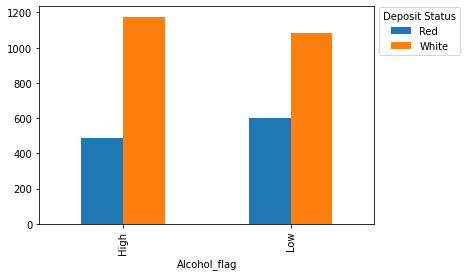

In [9]:
# Let's plot a few things
import matplotlib.pyplot as plt

# $marital will be rows, $y will be columns
two_way_table = pd.crosstab(wineFlagDF.Alcohol_flag, wineFlagDF.Type, margins=False)

ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Deposit Status', bbox_to_anchor=(1, 1.02), loc='upper left')


In [10]:
p_crosstab = pd.crosstab(wineFlagDF.Type, wineFlagDF.Sugar_flag)

print(p_crosstab)

Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


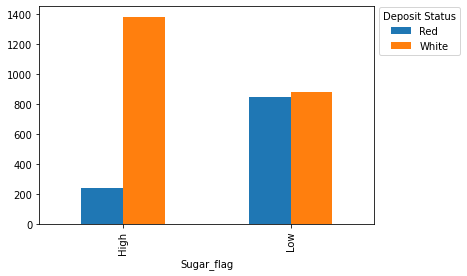

In [11]:
# Let's plot a few things
import matplotlib.pyplot as plt

# $marital will be rows, $y will be columns
two_way_table = pd.crosstab(wineFlagDF.Sugar_flag, wineFlagDF.Type, margins=False)

ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Deposit Status', bbox_to_anchor=(1, 1.02), loc='upper left')

Create contingency tables and plots:

Type vs. alcohol content

Type vs. Sugar content


Problem 5 Section

Use the tables from the previous step to calculate:

a. The prior probability of Type = Red and Type = White.

Red : 1085/3345=32.44%

White: 2260/3345=67.56%



b. The probability of high and low alcohol content.

High : 1661/3345=49.66%

Low : 1684/3345=50.34%



c. The probability of high and low sugar content.

High : 1619/3345=48.40%

Low : 1726/3345=51.6%


d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).

p(Alcohol_flag = High ∣ Type = Red) : 485/3345=14.49%

p(Alcohol_flag = Low ∣ Type = Red) : 600/3345=17.93%


e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

p(Sugar_flag = High ∣ Type = Red) : 237/3345=7.09%

p(Sugar_flag = Low ∣ Type = Red) : 1382/3345=41.31%



In [36]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineFlagDF.iloc[:,1:3]
y = encoded_wineFlagDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=1, shuffle=True, test_size=0.20, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1376             0           1
2809             0           1
2915             0           1
596              0           1
1690             1           0
...            ...         ...
768              0           0
79               1           1
1007             1           1
172              0           0
1695             1           0

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2559             0           0
1206             1           1
996              1           1
212              1           1
2360             1           0
...            ...         ...
2840             0           1
1196             1           1
2570             0           0
527              1           0
2979             0           0

[669 rows x 2 columns]


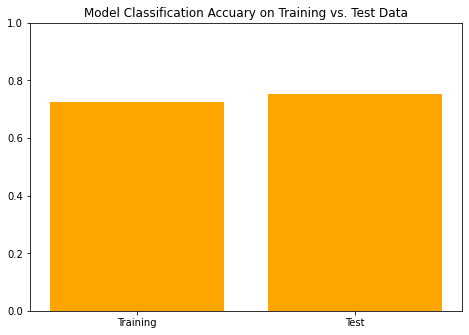

In [37]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [38]:
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineFlagDF.iloc[:,1:3]
y = encoded_wineFlagDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=50, shuffle=True, test_size=0.25, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1353             0           1
1350             0           1
2569             0           1
1916             1           0
479              0           1
...            ...         ...
1616             1           0
1093             1           0
1000             1           1
1096             1           1
1159             1           1

[2508 rows x 2 columns]
      Alcohol_flag  Sugar_flag
375              1           1
584              0           0
2813             0           0
450              0           1
1608             1           0
...            ...         ...
2018             1           0
1939             1           1
1694             1           0
806              1           0
2140             1           0

[837 rows x 2 columns]


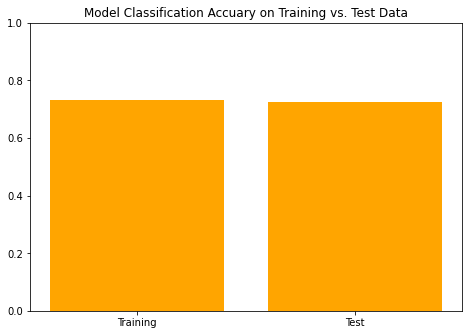

In [39]:
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()                        

In [40]:
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineFlagDF.iloc[:,1:3]
y = encoded_wineFlagDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=50, shuffle=True, test_size=0.30, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
3218             0           0
2405             1           1
527              1           0
3171             0           0
2872             0           1
...            ...         ...
2439             0           0
1093             1           0
1000             1           1
1096             1           1
1159             1           1

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2271             1           0
1679             1           0
2596             0           1
1642             1           0
2428             1           0
...            ...         ...
68               0           1
1291             1           1
3318             0           1
3203             0           1
2860             0           0

[1004 rows x 2 columns]


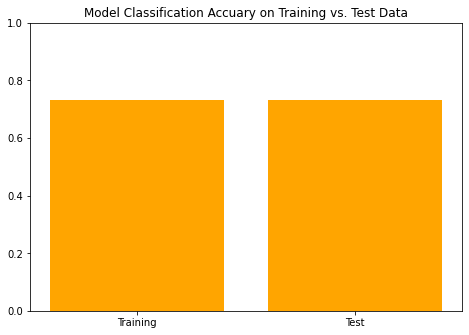

In [41]:
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()       

In [42]:
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineFlagDF.iloc[:,1:3]
y = encoded_wineFlagDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=50, shuffle=True, test_size=0.40, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
494              1           1
2359             1           0
1005             1           1
1245             1           1
3113             0           0
...            ...         ...
1096             1           1
2433             1           0
3008             0           1
1159             1           1
819              1           1

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2981             0           1
495              0           0
2116             1           0
631              0           0
3275             0           1
...            ...         ...
3051             0           1
2740             0           1
2491             0           0
844              0           1
2096             1           1

[1338 rows x 2 columns]


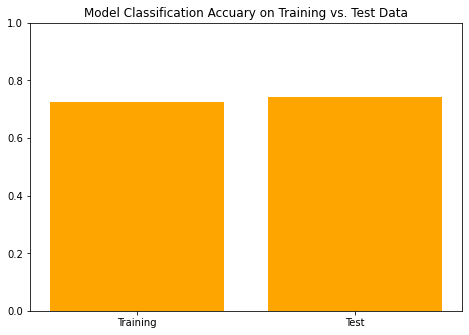

In [43]:
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()       

In [44]:
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineFlagDF.iloc[:,1:3]
y = encoded_wineFlagDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=50, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
print(X_train)
print(X_test)



      Alcohol_flag  Sugar_flag
1514             0           1
3239             0           0
3292             0           0
2773             0           1
3058             0           0
...            ...         ...
1096             1           1
1945             1           0
2820             0           1
1159             1           1
3019             0           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1155             1           0
3057             0           0
1521             0           0
996              1           1
2573             0           1
...            ...         ...
583              0           0
2224             1           0
1081             1           1
690              0           0
2721             0           1

[1673 rows x 2 columns]


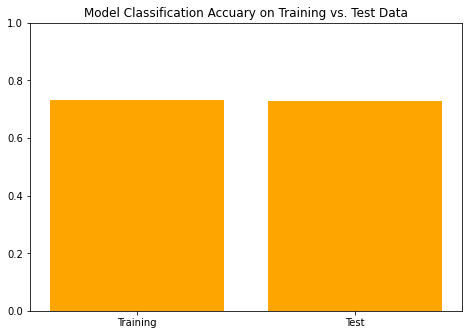

In [45]:
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()       

Create NB classifiers and plotted their accuracy on training/test ratios of:

80/20,75/25,70/30,60/40,50/50


Summarize:

Based of all the training and test ratios, there was no real change in the accuracy for each. The accuracy might have move .05 percent up or down on each of the 5 different sets of ratios i had. I was not sure why the results were not more drastic. I Even tried with a very small training and test ratio and it yielded the same results. Each seemwed to be about 77% accurate. I'm not sure if there is something I did wrong in my code or that the dataset is so big with only boolean answers that the accuracy was similar in all cases of each test ratio. 